# Figures to address referee comments

## Comment 1

Download z=1.5 descendants of selected z=2 population

In [1]:
from simulation_data import get
import h5py

from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import get_galaxy_particle_data, get_stellar_assembly_data

In [2]:
with h5py.File('redshift_ids.hdf5', 'r') as f:
    z1_5_ids = f['z1.5_ids'][:]

In [3]:
redshift = 1.5
#this initializes the values in simulation_data.galaxies.galaxy_population
ids = my_galaxy_population.select_galaxies(ids=z1_5_ids, redshift=redshift, mass_min=0, mass_max=12)

#calculate halo properties and store calculated data
my_galaxy_population.get_galaxy_population_data(ids=z1_5_ids)

deleted


D:\Pathak_2021\simulation_data\galaxies\galaxy.py:1585: RuntimeWarning: divide by zero encountered in log10
  return np.log10(total_mass)


next calc


{'ids': array([  4966,   4970,   4973, ..., 231797, 154479,  41399]),
 'median_age': array([2.08751376, 1.97135038, 2.73987366, ..., 1.83934218, 2.52074194,
        3.04351443]),
 'halfmass_radius': array([12.02037201,  3.94844996,  0.95482728, ...,  1.27894892,
         1.13900207,  0.82332448]),
 'total_mass': array([11.98376594, 10.8151201 , 10.74461054, ..., 10.57187518,
        10.54311998, 10.50861817]),
 'newbin_current_SFR': array([0.0217827 , 0.01000834, 0.        , ..., 0.23974672, 0.        ,
        0.        ]),
 'FeH_Re': array([-0.00162565,  0.02575456,  0.11672452, ...,  0.2077132 ,
         0.06246169,  0.01268298]),
 'MgFe_Re': array([0.42394367, 0.38508916, 0.37880427, ..., 0.28851634, 0.36750185,
        0.41147423]),
 'MgH_Re': array([0.38116556, 0.34068665, 0.4375003 , ..., 0.44487017, 0.3645421 ,
        0.34756228]),
 'FeH_1kpc': array([ 0.13952348,  0.21083097,  0.10836311, ...,  0.23161355,
         0.07505365, -0.01155498]),
 'MgFe_1kpc': array([0.41352654, 0

Recreate figures from paper

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import table

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 1.5

In [7]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]

In [8]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) 
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) 

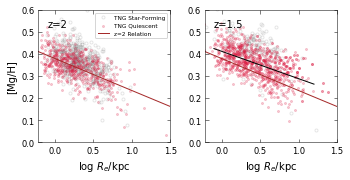

In [7]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 2, figsize=(5.0,2.5), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.0, 0.6]
redshiftlist = [2, 1.5]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/H]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, -0.1, 0.2, 1.2, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        ids = f['ids'][:]
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)

    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgH_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgH_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, 'o', markeredgecolor='gray', markerfacecolor='None',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set_box_aspect(1)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='upper right', fontsize=ftsss).set_zorder(200)


fig.tight_layout(w_pad=0.9)

# plt.savefig('REF FIGURES\z1p5_MgHRe.png', dpi=300, bbox_inches='tight')
plt.show()

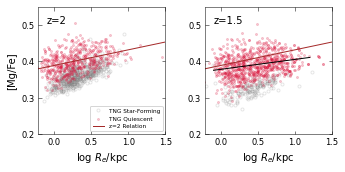

In [14]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs R_e
####################
fig, axes = plt.subplots(1, 2, figsize=(5.0,2.45), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.2, 0.55]
redshiftlist = [2, 1.5]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, -0.1, 0.2, 1.2, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgFe_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, 'o', markeredgecolor='gray', markerfacecolor='None',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set_yticks([0.2, 0.3, 0.4, 0.5], minor=False)
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5'])
    ax.set_box_aspect(1)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)

fig.tight_layout(w_pad=0.9)

# plt.savefig('REF FIGURES\z1p5_MgFeRe.png', dpi=300, bbox_inches='tight')
plt.show()

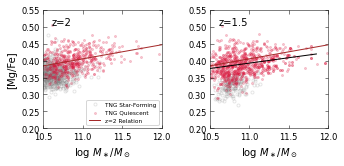

In [15]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs Mass
####################
fig, axes = plt.subplots(1, 2, figsize=(5.0,2.38), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [10.5, 12]
ylims = [0.2, 0.55]
redshiftlist = [2, 1.5]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $M_\ast/M_\odot$'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, -0.1, 0.2, 1.2, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = total_mass[quiescent_selection]
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = total_mass[starforming_selection]
    yy_sf = MgFe_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, 'o', markeredgecolor='gray', markerfacecolor='None',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([10.5, 11.85])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set_box_aspect(1)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)

fig.tight_layout(w_pad=0.9)

plt.savefig('REF FIGURES\z1p5_MgFeMass.png', dpi=300, bbox_inches='tight')
plt.show()

## Comment 2

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption, starmetalsZ_ratio, radius_only

z=2

In [3]:
import warnings
warnings.filterwarnings('ignore')

redshift = 2

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]

    
starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

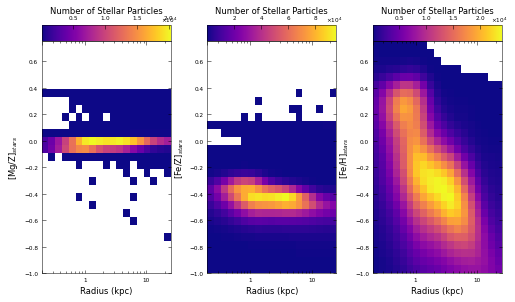

In [14]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
import matplotlib.ticker as mpltick

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(6.9, 3.83), constrained_layout=True)
ax3 = axes[1]
ax4 = axes[2]
ax1 = axes[0]

f.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
lw = 0.5

colormap1 = plt.get_cmap('terrain')
colormap2 = plt.get_cmap('gnuplot')
norm = colors.Normalize(vmin=0, vmax=30)
colormap = plt.get_cmap('plasma')
norm_plasma = colors.Normalize(vmin=vmin, vmax=230)
colormap_age = plt.get_cmap('rainbow')
norm_age = colors.Normalize(vmin=0, vmax=2.5)

ylim = [-1.0, 0.75]
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(0, 1, 30)
metalbins = np.linspace(ylim[0], ylim[1], 30)
densitybins2 = np.linspace(1.5, 12, 20)

xbins_new = (xbins[1:]+xbins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

np.random.seed(0)

#z=2 star-forming galaxies
big_h3 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h4 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h1 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_R_star = np.zeros(0)
big_FeH_star = np.zeros(0)
big_FeZ_star = np.zeros(0)
big_MgZ_star = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R_star = radius_only(id=id, redshift=redshift)
    if type(R_star) == int:
        pass
    else:
        FeH_star = starmetals_only(id=id, redshift=redshift, num='iron', den='hydrogen')
        FeZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='iron')
        MgZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='magnesium')
        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_FeH_star = np.concatenate((big_FeH_star, FeH_star), axis=None)
        big_FeZ_star = np.concatenate((big_FeZ_star, FeZ_star), axis=None)
        big_MgZ_star = np.concatenate((big_MgZ_star, MgZ_star), axis=None)
        h3, _, _ = np.histogram2d(R_star, MgZ_star, bins=[xbins, metalbins], density=False)
        big_h3 += h3
        h1, _, _ = np.histogram2d(R_star, FeZ_star, bins=[xbins, metalbins], density=False)
        big_h1 += h1
        h4, _, _ = np.histogram2d(R_star, FeH_star, bins=[xbins, metalbins], density=False)
        big_h4 += h4

# panel 1
big_h3[big_h3==0] = np.nan
color=colormap(norm_plasma(big_h3)).tolist()
color = tuple(color[0][:])
im1 = ax1.pcolormesh(xbins, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
    ax.set_xlabel("Radius (kpc)", fontsize=fts)
    ax.set_ylim(ylim[0], ylim[1])
    # skinny box edge
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)
ax1.set_ylabel('[Mg/Z]$_{stars}$', fontsize=fts)

# panel 2
big_h1[big_h1==0] = np.nan
color=colormap(norm_plasma(big_h1)).tolist()
color = tuple(color[0][:])
im3 = ax3.pcolormesh(xbins, metalbins, big_h1.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylabel('[Fe/Z]$_{stars}$', fontsize=fts)

# panel 3
big_h4[big_h4==0] = np.nan
color=colormap(norm_plasma(big_h4)).tolist()
color = tuple(color[0][:])
im4 = ax4.pcolormesh(xbins, metalbins, big_h4.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_ylabel('[Fe/H]$_{stars}$', fontsize=fts)

# colorbar
ims = [im1, im3, im4]
cbar_labels = ['Number of Stellar Particles', 'Number of Stellar Particles', 'Number of Stellar Particles']
i = -1
for ax in axes:
    i += 1
    divider = make_axes_locatable(ax)
    fmt = mpltick.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cax = divider.append_axes("top", size="7%", pad=0.0)
#     if i == 0:
#         cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal', ticks=[5000, 10000, 15000, 20000, 25000])#, format='%.0e')
#     else:
    cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal')
    cbar.outline.set_linewidth(0.5)
    cax.text(0.92, 1.2, r'$\times 10^4$', size=ftss, transform=cax.transAxes)
    cbar.set_label(cbar_labels[i], fontsize=fts, rotation=0, labelpad=-35)
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)
    cbar.ax.xaxis.offsetText.set_visible(False)
    cbar.ax.yaxis.offsetText.set_visible(False)
    cbar.update_ticks()

# f.tight_layout()
# f.tight_layout(w_pad=0.3)

# plt.savefig('REF FIGURES\z2_metallicity_profiles.png', dpi=300, bbox_inches='tight')

z=0.7

In [15]:
import warnings
warnings.filterwarnings('ignore')

redshift = 0.7

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]

    
starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

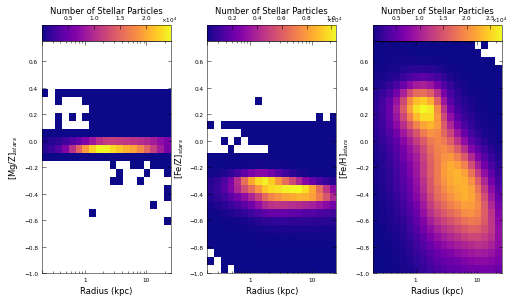

In [16]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
import matplotlib.ticker as mpltick

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(6.9, 3.83), constrained_layout=True)
ax3 = axes[1]
ax4 = axes[2]
ax1 = axes[0]

f.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
lw = 0.5

colormap1 = plt.get_cmap('terrain')
colormap2 = plt.get_cmap('gnuplot')
norm = colors.Normalize(vmin=0, vmax=30)
colormap = plt.get_cmap('plasma')
norm_plasma = colors.Normalize(vmin=vmin, vmax=230)
colormap_age = plt.get_cmap('rainbow')
norm_age = colors.Normalize(vmin=0, vmax=2.5)

ylim = [-1.0, 0.75]
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(0, 1, 30)
metalbins = np.linspace(ylim[0], ylim[1], 30)
densitybins2 = np.linspace(1.5, 12, 20)

xbins_new = (xbins[1:]+xbins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

np.random.seed(0)

#z=2 star-forming galaxies
big_h3 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h4 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h1 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_R_star = np.zeros(0)
big_FeH_star = np.zeros(0)
big_FeZ_star = np.zeros(0)
big_MgZ_star = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R_star = radius_only(id=id, redshift=redshift)
    if type(R_star) == int:
        pass
    else:
        FeH_star = starmetals_only(id=id, redshift=redshift, num='iron', den='hydrogen')
        FeZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='iron')
        MgZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='magnesium')
        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_FeH_star = np.concatenate((big_FeH_star, FeH_star), axis=None)
        big_FeZ_star = np.concatenate((big_FeZ_star, FeZ_star), axis=None)
        big_MgZ_star = np.concatenate((big_MgZ_star, MgZ_star), axis=None)
        h3, _, _ = np.histogram2d(R_star, MgZ_star, bins=[xbins, metalbins], density=False)
        big_h3 += h3
        h1, _, _ = np.histogram2d(R_star, FeZ_star, bins=[xbins, metalbins], density=False)
        big_h1 += h1
        h4, _, _ = np.histogram2d(R_star, FeH_star, bins=[xbins, metalbins], density=False)
        big_h4 += h4

# panel 1
big_h3[big_h3==0] = np.nan
color=colormap(norm_plasma(big_h3)).tolist()
color = tuple(color[0][:])
im1 = ax1.pcolormesh(xbins, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
    ax.set_xlabel("Radius (kpc)", fontsize=fts)
    ax.set_ylim(ylim[0], ylim[1])
    # skinny box edge
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)
ax1.set_ylabel('[Mg/Z]$_{stars}$', fontsize=fts)

# panel 2
big_h1[big_h1==0] = np.nan
color=colormap(norm_plasma(big_h1)).tolist()
color = tuple(color[0][:])
im3 = ax3.pcolormesh(xbins, metalbins, big_h1.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylabel('[Fe/Z]$_{stars}$', fontsize=fts)

# panel 3
big_h4[big_h4==0] = np.nan
color=colormap(norm_plasma(big_h4)).tolist()
color = tuple(color[0][:])
im4 = ax4.pcolormesh(xbins, metalbins, big_h4.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_ylabel('[Fe/H]$_{stars}$', fontsize=fts)

# colorbar
ims = [im1, im3, im4]
cbar_labels = ['Number of Stellar Particles', 'Number of Stellar Particles', 'Number of Stellar Particles']
i = -1
for ax in axes:
    i += 1
    divider = make_axes_locatable(ax)
    fmt = mpltick.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cax = divider.append_axes("top", size="7%", pad=0.0)
#     if i == 0:
#         cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal', ticks=[5000, 10000, 15000, 20000, 25000])#, format='%.0e')
#     else:
    cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal')
    cbar.outline.set_linewidth(0.5)
    cax.text(0.92, 1.2, r'$\times 10^4$', size=ftss, transform=cax.transAxes)
    cbar.set_label(cbar_labels[i], fontsize=fts, rotation=0, labelpad=-35)
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)
    cbar.ax.xaxis.offsetText.set_visible(False)
    cbar.ax.yaxis.offsetText.set_visible(False)
    cbar.update_ticks()

# f.tight_layout()
# f.tight_layout(w_pad=0.3)

plt.savefig('REF FIGURES\z0p7_metallicity_profiles.png', dpi=300, bbox_inches='tight')

z=0

In [18]:
import warnings
warnings.filterwarnings('ignore')

redshift = 0

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]

    
starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

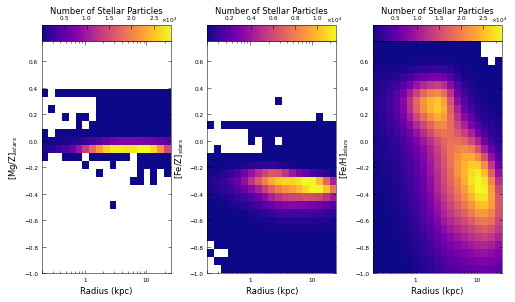

In [19]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
import matplotlib.ticker as mpltick

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(6.9, 3.83), constrained_layout=True)
ax3 = axes[1]
ax4 = axes[2]
ax1 = axes[0]

f.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
lw = 0.5

colormap1 = plt.get_cmap('terrain')
colormap2 = plt.get_cmap('gnuplot')
norm = colors.Normalize(vmin=0, vmax=30)
colormap = plt.get_cmap('plasma')
norm_plasma = colors.Normalize(vmin=vmin, vmax=230)
colormap_age = plt.get_cmap('rainbow')
norm_age = colors.Normalize(vmin=0, vmax=2.5)

ylim = [-1.0, 0.75]
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(0, 1, 30)
metalbins = np.linspace(ylim[0], ylim[1], 30)
densitybins2 = np.linspace(1.5, 12, 20)

xbins_new = (xbins[1:]+xbins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

np.random.seed(0)

#z=2 star-forming galaxies
big_h3 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h4 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h1 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_R_star = np.zeros(0)
big_FeH_star = np.zeros(0)
big_FeZ_star = np.zeros(0)
big_MgZ_star = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R_star = radius_only(id=id, redshift=redshift)
    if type(R_star) == int:
        pass
    else:
        FeH_star = starmetals_only(id=id, redshift=redshift, num='iron', den='hydrogen')
        FeZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='iron')
        MgZ_star = starmetalsZ_ratio(id=id, redshift=redshift, num='magnesium')
        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_FeH_star = np.concatenate((big_FeH_star, FeH_star), axis=None)
        big_FeZ_star = np.concatenate((big_FeZ_star, FeZ_star), axis=None)
        big_MgZ_star = np.concatenate((big_MgZ_star, MgZ_star), axis=None)
        h3, _, _ = np.histogram2d(R_star, MgZ_star, bins=[xbins, metalbins], density=False)
        big_h3 += h3
        h1, _, _ = np.histogram2d(R_star, FeZ_star, bins=[xbins, metalbins], density=False)
        big_h1 += h1
        h4, _, _ = np.histogram2d(R_star, FeH_star, bins=[xbins, metalbins], density=False)
        big_h4 += h4

# panel 1
big_h3[big_h3==0] = np.nan
color=colormap(norm_plasma(big_h3)).tolist()
color = tuple(color[0][:])
im1 = ax1.pcolormesh(xbins, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
    ax.set_xlabel("Radius (kpc)", fontsize=fts)
    ax.set_ylim(ylim[0], ylim[1])
    # skinny box edge
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)
ax1.set_ylabel('[Mg/Z]$_{stars}$', fontsize=fts)

# panel 2
big_h1[big_h1==0] = np.nan
color=colormap(norm_plasma(big_h1)).tolist()
color = tuple(color[0][:])
im3 = ax3.pcolormesh(xbins, metalbins, big_h1.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylabel('[Fe/Z]$_{stars}$', fontsize=fts)

# panel 3
big_h4[big_h4==0] = np.nan
color=colormap(norm_plasma(big_h4)).tolist()
color = tuple(color[0][:])
im4 = ax4.pcolormesh(xbins, metalbins, big_h4.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_ylabel('[Fe/H]$_{stars}$', fontsize=fts)

# colorbar
ims = [im1, im3, im4]
cbar_labels = ['Number of Stellar Particles', 'Number of Stellar Particles', 'Number of Stellar Particles']
i = -1
for ax in axes:
    i += 1
    divider = make_axes_locatable(ax)
    fmt = mpltick.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cax = divider.append_axes("top", size="7%", pad=0.0)
#     if i == 0:
#         cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal', ticks=[5000, 10000, 15000, 20000, 25000])#, format='%.0e')
#     else:
    cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal')
    cbar.outline.set_linewidth(0.5)
    cax.text(0.92, 1.2, r'$\times 10^4$', size=ftss, transform=cax.transAxes)
    cbar.set_label(cbar_labels[i], fontsize=fts, rotation=0, labelpad=-35)
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)
    cbar.ax.xaxis.offsetText.set_visible(False)
    cbar.ax.yaxis.offsetText.set_visible(False)
    cbar.update_ticks()

# f.tight_layout()
# f.tight_layout(w_pad=0.3)

plt.savefig('REF FIGURES\z0_metallicity_profiles.png', dpi=300, bbox_inches='tight')

# Comment 3

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption, starmetalsZ_ratio, radius_only

In [2]:
import warnings
warnings.filterwarnings('ignore')

redshift = 2

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]

    
starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

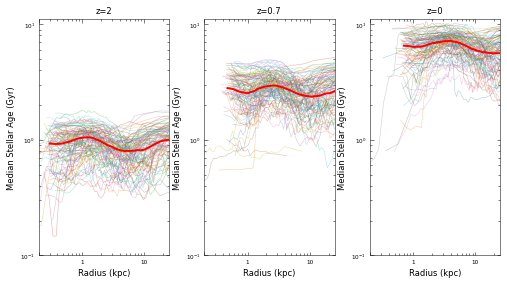

In [25]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
import warnings
warnings.filterwarnings('ignore')

#metallicity profiles
fig, axes = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(6.9, 3.83), constrained_layout=True) #(24, 10)


fig.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
linewidth=0.5

redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent

np.random.seed(0)

count = -1
for ax in axes:
    count += 1
    
    # get redshift data
    redshift = redshiftlist[count]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        ids = f['ids'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    big_age = np.zeros(0)
    big_R_star = np.zeros(0)
    for id in np.random.choice(ids[starforming_selection], 100, replace=False):
        stellar_data = get_galaxy_particle_data(id=id , redshift=redshift, populate_dict=True)

        dx = stellar_data['relative_x_coordinates']
        dy = stellar_data['relative_y_coordinates']
        dz = stellar_data['relative_z_coordinates']
        R_star = (dx**2 + dy**2 + dz**2)**(1/2)#units: physical kpc
        age = stellar_data['LookbackTime']

        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_age = np.concatenate((big_age, age), axis=None)

        R_percentiles = np.zeros(n_bins + 1)
        for i in range(1, (n_bins+1)):
            R_percentiles[i] = np.percentile(R_star, (100/n_bins)*i)
        age_stat, _, _ = scipy.stats.binned_statistic(R_star, age, 'median', bins=R_percentiles)
        ax.plot(R_percentiles[2:], age_stat[1:], alpha = 0.4, linewidth=linewidth)

    # overplot median line
    big_R_percentiles = np.zeros(n_bins + 1)
    for i in range(1, (n_bins+1)):
        big_R_percentiles[i] = np.percentile(big_R_star, (100/n_bins)*i)
    big_age_stat, bin_edges, bin_number = scipy.stats.binned_statistic(big_R_star, big_age, 'median', bins=big_R_percentiles)
    ax.plot(big_R_percentiles[2:], big_age_stat[1:], color='r', linewidth=2)

    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5) #, labelsize=ftss
    ax.set_xlabel('Radius (kpc)', fontsize=fts)
    ax.set_ylim(0.1, 11)
    ax.set_ylabel("Median Stellar Age (Gyr)", fontsize=fts)
    ax.set_yscale('log')
#     ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.set_title('z='+str(redshift), fontsize=fts)

    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)


# fig.tight_layout(w_pad=0.4)


plt.savefig('REF FIGURES/z0-2_ageprofile.png', dpi=300, bbox_inches='tight')
plt.show()